In [1]:
# IMPORT REQUIRED LIBRARIES

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt             
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.models as Models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import cv2

In [6]:
IMAGE_SIZE = (228, 228)

BATCH_SIZE = 32

In [7]:
# LOADING THE DATASET
train_dir='C:/Users/ben/Downloads/Zeeler-new/CNN/seg_train'
test_dir='C:/Users/ben/Downloads/Zeeler-new/CNN/seg_test'

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=IMAGE_SIZE,
  batch_size=BATCH_SIZE)

Found 11000 files belonging to 5 classes.


In [9]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  seed=123,
  image_size=IMAGE_SIZE,
  batch_size=BATCH_SIZE)

Found 2305 files belonging to 5 classes.


In [10]:
class_names = train_ds.class_names
print(class_names)

['buildings', 'forest', 'glacier', 'mountain', 'sea']


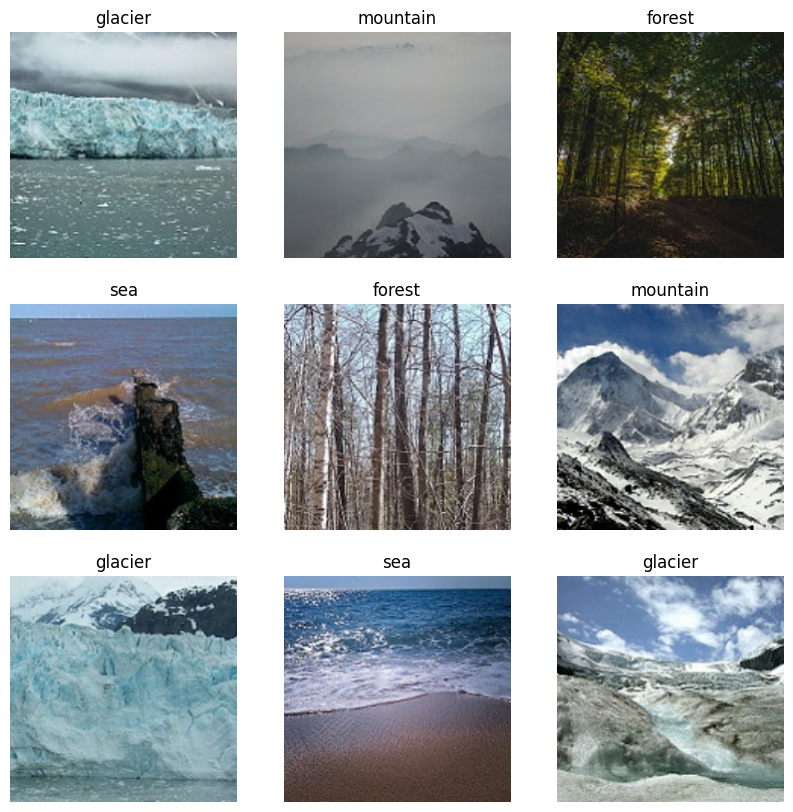

In [11]:
# GIVE A VISUALIZATION OF YOUR MODEL

# VISUALIZE THE DATA
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [12]:
num_classes = len(class_names)

In [13]:
# MODEL CREATION

model = Models.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(228,228,3)))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [14]:
# MODEL SUMMARY
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 226, 226, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 113, 113, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 111, 111, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [15]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [16]:
# SETUP A EARLY STOPPING CALL and model check point API
earlystopping = EarlyStopping(monitor='val_loss',
                                              patience=5,
                                              verbose=1,
                                              mode='min'
                                              )
checkpointer = ModelCheckpoint(filepath='bestvalue', verbose=0, save_best_only=True)
callback_list = [checkpointer, earlystopping]

In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=35,
    callbacks=callback_list
)

Epoch 1/35


c:\users\ben\appdata\local\programs\python\python38\lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


344/344 [==============================] - ETA: 0s - loss: 1.2284 - accuracy: 0.5951

INFO:tensorflow:Assets written to: bestvalue\assets


INFO:tensorflow:Assets written to: bestvalue\assets


344/344 [==============================] - 1554s 4s/step - loss: 1.2284 - accuracy: 0.5951 - val_loss: 1.0693 - val_accuracy: 0.6065
Epoch 2/35
344/344 [==============================] - ETA: 0s - loss: 0.7717 - accuracy: 0.7125

INFO:tensorflow:Assets written to: bestvalue\assets


INFO:tensorflow:Assets written to: bestvalue\assets


344/344 [==============================] - 1517s 4s/step - loss: 0.7717 - accuracy: 0.7125 - val_loss: 0.6496 - val_accuracy: 0.7566
Epoch 3/35
344/344 [==============================] - ETA: 0s - loss: 0.6576 - accuracy: 0.7598

INFO:tensorflow:Assets written to: bestvalue\assets


INFO:tensorflow:Assets written to: bestvalue\assets


344/344 [==============================] - 1476s 4s/step - loss: 0.6576 - accuracy: 0.7598 - val_loss: 0.5968 - val_accuracy: 0.7831
Epoch 4/35
344/344 [==============================] - ETA: 0s - loss: 0.5385 - accuracy: 0.8078

INFO:tensorflow:Assets written to: bestvalue\assets


INFO:tensorflow:Assets written to: bestvalue\assets


344/344 [==============================] - 1383s 4s/step - loss: 0.5385 - accuracy: 0.8078 - val_loss: 0.5765 - val_accuracy: 0.7857
Epoch 5/35
344/344 [==============================] - ETA: 0s - loss: 0.4749 - accuracy: 0.8334

INFO:tensorflow:Assets written to: bestvalue\assets


INFO:tensorflow:Assets written to: bestvalue\assets


344/344 [==============================] - 1482s 4s/step - loss: 0.4749 - accuracy: 0.8334 - val_loss: 0.4824 - val_accuracy: 0.8282
Epoch 6/35
344/344 [==============================] - 1598s 5s/step - loss: 0.4212 - accuracy: 0.8506 - val_loss: 0.5164 - val_accuracy: 0.8278
Epoch 7/35
344/344 [==============================] - 2450s 7s/step - loss: 0.4024 - accuracy: 0.8574 - val_loss: 0.4878 - val_accuracy: 0.8412
Epoch 8/35
344/344 [==============================] - 3287s 10s/step - loss: 0.3459 - accuracy: 0.8771 - val_loss: 0.5285 - val_accuracy: 0.8278
Epoch 9/35
344/344 [==============================] - 2772s 8s/step - loss: 0.3155 - accuracy: 0.8847 - val_loss: 0.4943 - val_accuracy: 0.8456
Epoch 10/35
303/344 [=========================>....] - ETA: 3:25 - loss: 0.3087 - accuracy: 0.8914

In [ ]:
# MODEL SUMMARY
model.summary()

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='training set')
plt.plot(history.history['val_loss'], label='test set')
plt.legend()

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='training set')
plt.plot(history.history['val_accuracy'], label='test set')
plt.legend()

In [ ]:
# Prediction on unseen image data
# load the prediction data and predict class on unseen data
def getImagePaths(path):
    image_names = []
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            fullpath = os.path.join(dirname, filename)
            image_names.append(fullpath)
    return image_names

pred_dir = 'C:/Users/ben/Downloads/Zeeler-new/CNN/seg_pred'

images_paths = getImagePaths(pred_dir)
len(images_paths)

In [ ]:
# images path list to numpy array using cv2.imread module
file_array = []

for file in images_paths[:9]:
    img_ = image.load_img(file, target_size=(228, 228))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255. 
    file_array.append(img_processed)
    
file_array = np.array(file_array)

In [ ]:
classes = train_ds.class_names
print(classes)

In [ ]:
def predict_image(filename, model):
    img_ = image.load_img(filename, target_size=(228, 228))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.
    
    prediction = model.predict(img_processed)
    
    index = np.argmax(prediction)
    
    plt.title("Prediction - {}".format(str(classes[index]).title()), size=18, color='red')
    plt.imshow(img_array)

In [ ]:
predict_image('C:/Users/ben/Downloads/Zeeler-new/CNN/seg_pred/10045.jpg', model)